<a href="https://colab.research.google.com/github/kowoonho/machine-learning/blob/main/multilayer_perceptron_to_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import random
digits = load_digits() #손글씨 데이터 로드

In [3]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
) # 모델 생성 3개의 layer로 구성

X = digits.data
Y = digits.target
X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

losses = [] # epoch마다 cost를 저장

In [4]:
for epoch in range(101):
  optimizer.zero_grad()
  hypothesis = model(X)

  cost = loss_fn(hypothesis, Y)
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, 100, cost.item()
    ))
  losses.append(cost.item())

Epoch    0/100 Cost: 2.362897
Epoch   10/100 Cost: 2.080415
Epoch   20/100 Cost: 1.795021
Epoch   30/100 Cost: 1.420350
Epoch   40/100 Cost: 1.032274
Epoch   50/100 Cost: 0.713716
Epoch   60/100 Cost: 0.495913
Epoch   70/100 Cost: 0.358194
Epoch   80/100 Cost: 0.275060
Epoch   90/100 Cost: 0.222145
Epoch  100/100 Cost: 0.186409


In [5]:
print(X[0].type)

<built-in method type of Tensor object at 0x7f792ff8af50>


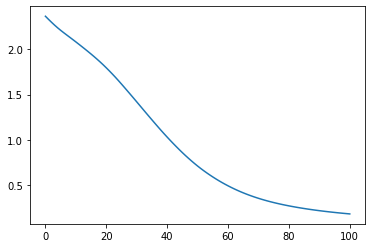

In [6]:
plt.plot(losses)

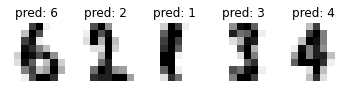

In [19]:
# 랜덤하게 5개의 수를 뽑아서 예측값 출력
import numpy as np
for i in range(5):
  r = np.random.randint(0, 1797);
  image = digits.images[r]
  label = digits.target[r]
  hypothesis = model(torch.tensor(digits.data[r], dtype=torch.float32)) 
  pred_y = torch.argmax(hypothesis)
  plt.subplot(2,5,i+1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('pred: %i' % pred_y)

In [ ]:
## "pytorch로 시작하는 딥러닝 입문"을 참고하여 쓴 코드입니다.
## https://wikidocs.net/61046